In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
def f_exo11(X):
    x,y = X[0],X[1]
    return (1/4)*(x**4) - (1/2)*(x**2) + (1/4)*(y**4) - (1/2)*(y**2) + 2*x*y 

In [3]:
f_exo11((-np.sqrt(3),np.sqrt(3)))

-4.5

In [4]:
def grad(X):
    x,y = X[0],X[1]
    return (x**3)-x + 2*y,(y**3) - y+ 2*x

In [5]:
def hess(X):
    x,y = X[0],X[1]
    return np.array(
        [[3*(x**2)-1,2],
         [2,3*(y**2)-1]]
    )

In [6]:
def newton_direction(X):
    return np.linalg.inv(hess(X)) @ grad(X)

In [7]:
def level_plot(levels,gradX,gradY):
    plt.figure(figsize=(10,10))
    xlist = np.linspace(-5,5,1000)
    ylist = np.linspace(-5,5,1000)
    X,Y = np.meshgrid(xlist,ylist)
    F = f_exo11((X,Y))
    plt.contour(X,Y,F,colors = 'k', linestyles = 'solid')
    plt.plot(gradX,gradY, color = 'red' , label= 'Xn')
    plt.legend()
    plt.show()

In [8]:
def gradient_decent(X0,alpha,accuracy):    
    x,y = X0[0],X0[1]
    i = 0
    diff = 1
    xn = [x]
    yn = [y]
    while ( diff > accuracy):
        i+=1
        f_before = f_exo11((x,y))
        x= x - (alpha * grad ((x,y))[0])
        y= y - (alpha * grad ((x,y))[1])
        xn.append(x)
        yn.append(y)
        diff = f_before - f_exo11((x,y))
    print("valeur minimale de f= " +str(f_exo11((x,y))) )
    print("point x* = "+ str(x)+","+str(y))
    print("nbr d'iteration = "+ str(i))
    level_plot([1000],xn,yn)

valeur minimale de f= -4.499999175966432
point x* = -1.7316762177316043,1.731684204463685
nbr d'iteration = 1439


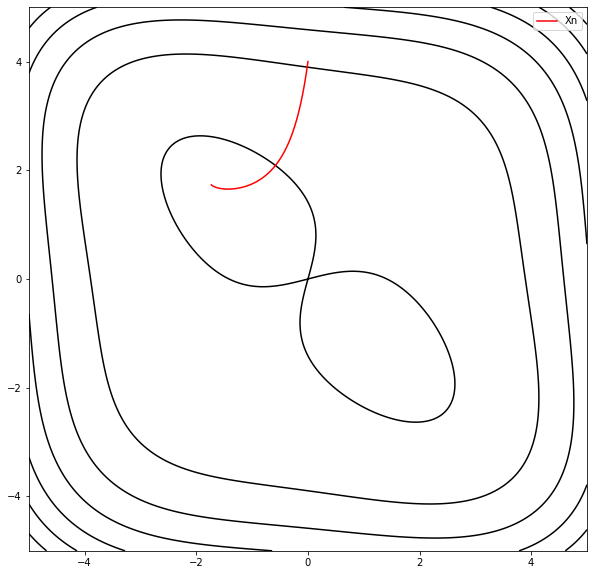

In [9]:
gradient_decent((0,4),0.001,10**(-8))

valeur minimale de f= -4.499999267881568
point x* = 1.7316187626703776,-1.7318529547577408
nbr d'iteration = 893


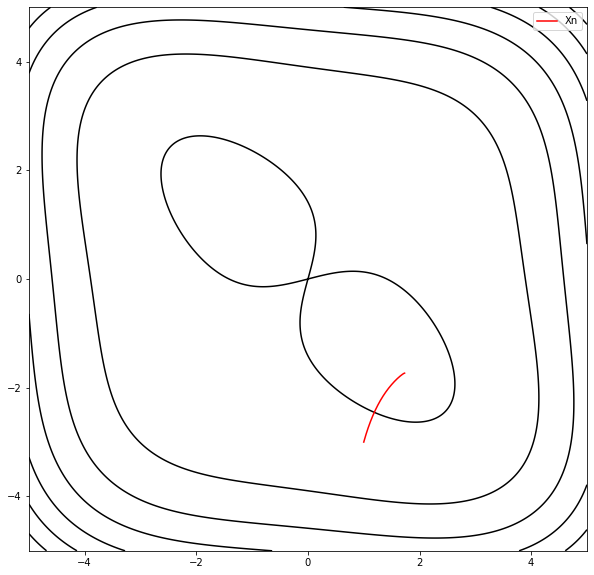

In [10]:
gradient_decent((1,-3),0.001,10**(-8))

valeur minimale de f= -4.499999177701053
point x* = -1.7316798899152668,1.7316812433205007
nbr d'iteration = 4251


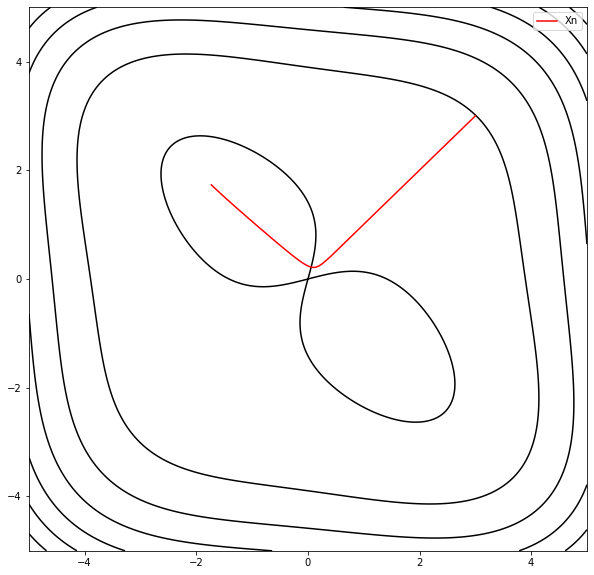

In [11]:
gradient_decent((3,3),0.001,10**(-8))

In [12]:
def newton_method(X0,accuracy):
    x,y = X0[0],X0[1]
    i = 0
    diff = 1
    print(f_exo11((x,y)))
    xn = [x]
    yn = [y]
    while ( diff > accuracy):
        i+=1
        f_before = f_exo11((x,y))
        a = newton_direction((x,y))
        x= x - a[0]
        y= y - a[1]
        xn.append(x)
        yn.append(y)
        diff = np.abs(f_before - f_exo11((x,y)))
    print("valeur minimale de f= " +str(f_exo11((x,y))) )
    print("point x* = "+ str(x)+","+str(y))
    print("nbr d'iteration = "+ str(i))
    level_plot([1000],xn,yn)

7.390625
valeur minimale de f= -4.5
point x* = 1.7320508075688774,-1.7320508075688774
nbr d'iteration = 6


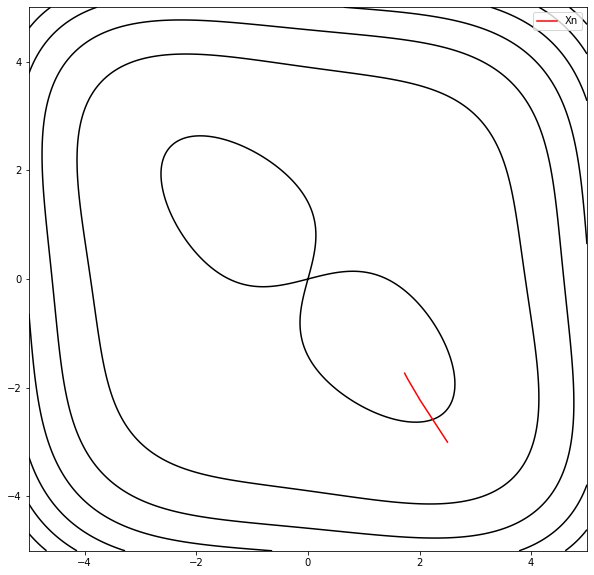

In [13]:
newton_method((2.5,-3),10**(-8))

42.0
valeur minimale de f= -4.5
point x* = -1.732050807591534,1.7320508076315506
nbr d'iteration = 6


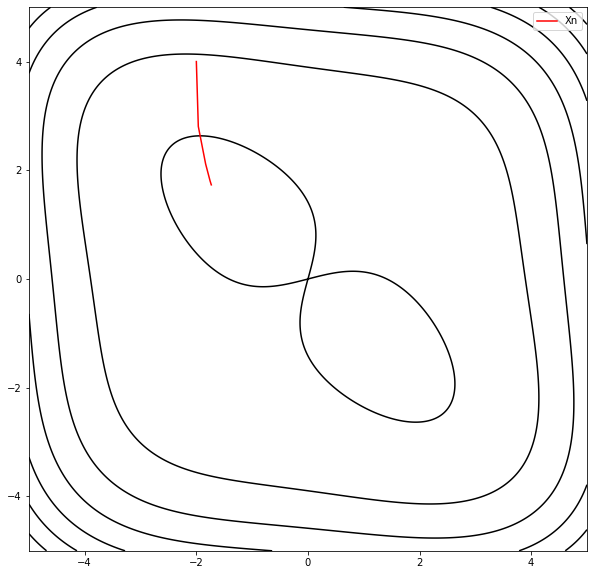

In [14]:
newton_method((-2,4),10**(-8))

49.5
valeur minimale de f= 2.2231019482310903e-28
point x* = 1.4910070248765062e-14,1.4910070248765062e-14
nbr d'iteration = 7


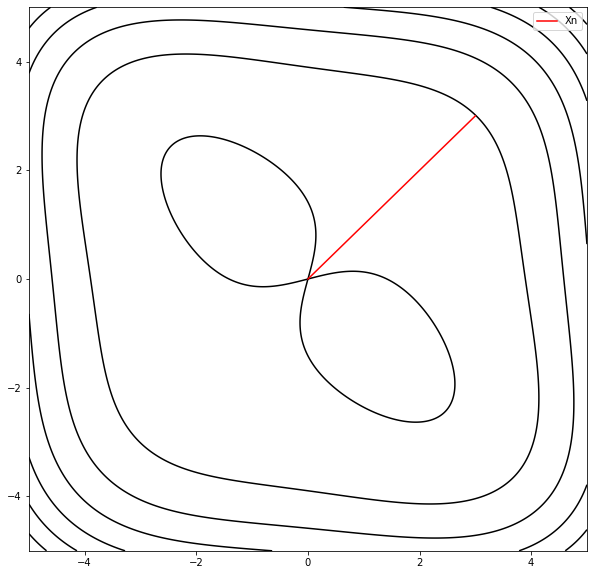

In [15]:
newton_method((3,3),10**(-8))